## ML Data Preprocessing

`Data Preprocessing includes the steps we need to follow to transform or encode data so that it may be easily parsed by the machine.` 

`The main agenda for a model to be accurate and precise in predictions is that the algorithm should be able to easily interpret the data's features.`

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from scipy import stats
import datetime 
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [27]:
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')
from data_preprocessing import data_preProcessing_script
from plot import exploration
from data_manipulation import DataManipulator
from cleaner import DataCleaner

In [3]:
# Reading data sets
store_data = pd.read_csv('../data/store.csv')
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [4]:
# Merging the training dataset with the store dataset 
train_store=pd.merge(train_data, store_data, on='Store', how='inner')

In [5]:
# Merging the test dataset with the store dataset
test_store=pd.merge(test_data, store_data, on='Store', how='inner')

In [7]:
# showing the data 
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [8]:
# getting the information
preprocess = data_preProcessing_script(train_store)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
# changeing date object to datetime type
train_store.Date = pd.to_datetime(train_store["Date"])

In [10]:
# object creation
train_store_cleaner = DataCleaner(train_store)

In [11]:
# separate date into day, month, year
train_store_cleaner.separate_date_column(date_column='Date')

In [12]:
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Year                       1017209 non-null  int64         
 4   Month                      1017209 non-null  int64         
 5   Day                        1017209 non-null  int64         
 6   Sales                      1017209 non-null  int64         
 7   Customers                  1017209 non-null  int64         
 8   Open                       1017209 non-null  int64         
 9   Promo                      1017209 non-null  int64         
 10  StateHoliday               1017209 non-null  object        
 11  SchoolHoliday              1017209 no

### Missing Value Manipulation

In [13]:
preprocess.colums_WithMissingValue()

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [14]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


In [15]:
# Filling Missing Values
try:
    train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)
    train_store['CompetitionOpenSinceMonth'].fillna(train_store['CompetitionOpenSinceMonth'].mode().iloc[0], inplace = True)
    train_store['CompetitionOpenSinceYear'].fillna(train_store['CompetitionOpenSinceYear'].mode().iloc[0], inplace = True)
# 
    train_store['Promo2SinceWeek'].fillna(train_store['Promo2SinceWeek'].mode().iloc[0], inplace=True)
    train_store['Promo2SinceYear'].fillna(train_store['Promo2SinceYear'].mode().iloc[0], inplace = True)
    train_store['PromoInterval'].fillna(train_store['PromoInterval'].mode().iloc[0], inplace=True)
#     
except Exception as e:
    print("Failed to fill missing vlaues")

In [16]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


In [17]:
preprocess.colums_WithMissingValue()

[]

In [18]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{train_store.shape}')

Shapes of our datasets
-----------------------
Training dataset:(1017209, 21)


### Outliers

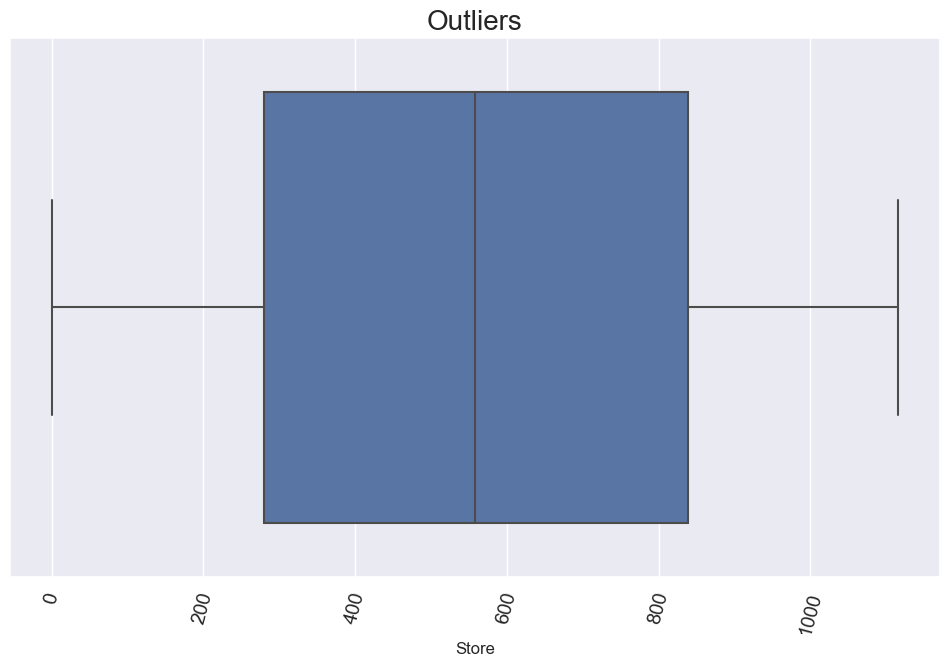

In [21]:
exploration.plot_box(train_store, 'Store', 'Outliers')

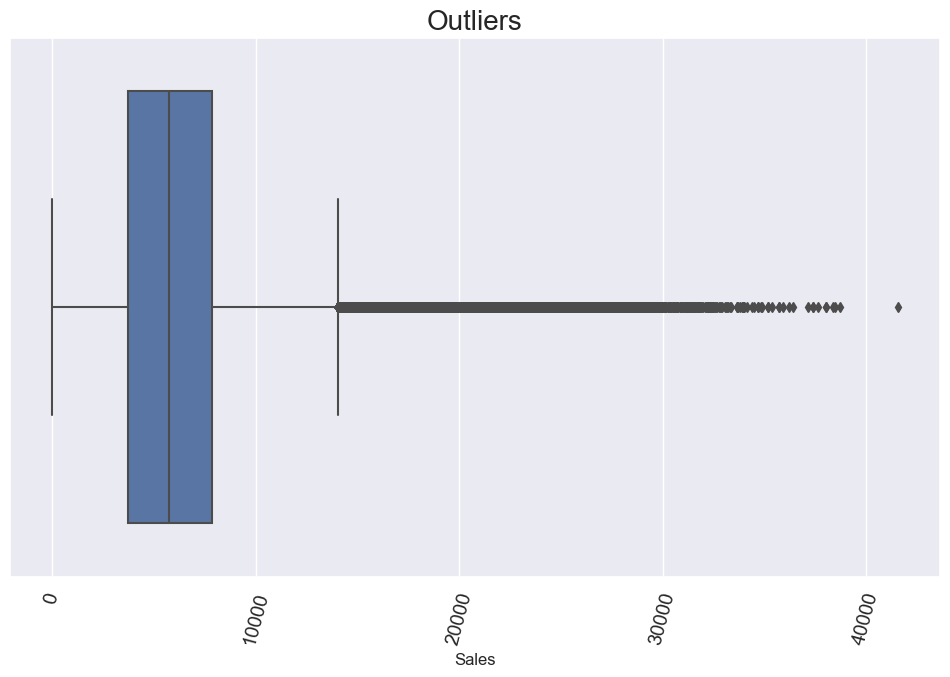

In [22]:
exploration.plot_box(train_store, 'Sales', 'Outliers')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

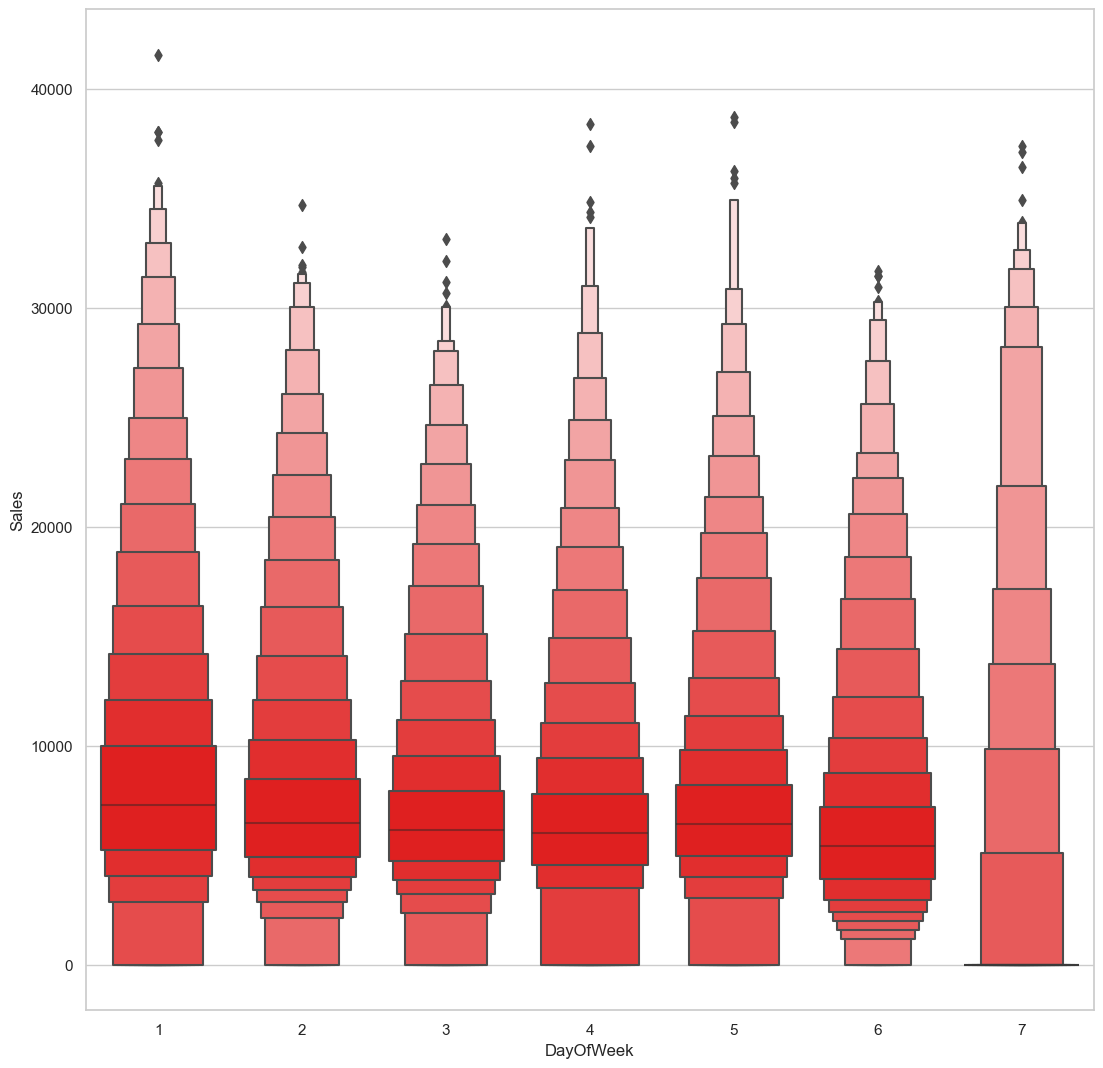

In [23]:
plt.figure(figsize=(13,13))
sns.set(style="whitegrid")
sns.boxenplot(data=train_store,scale="linear",x="DayOfWeek",y="Sales",color="red")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

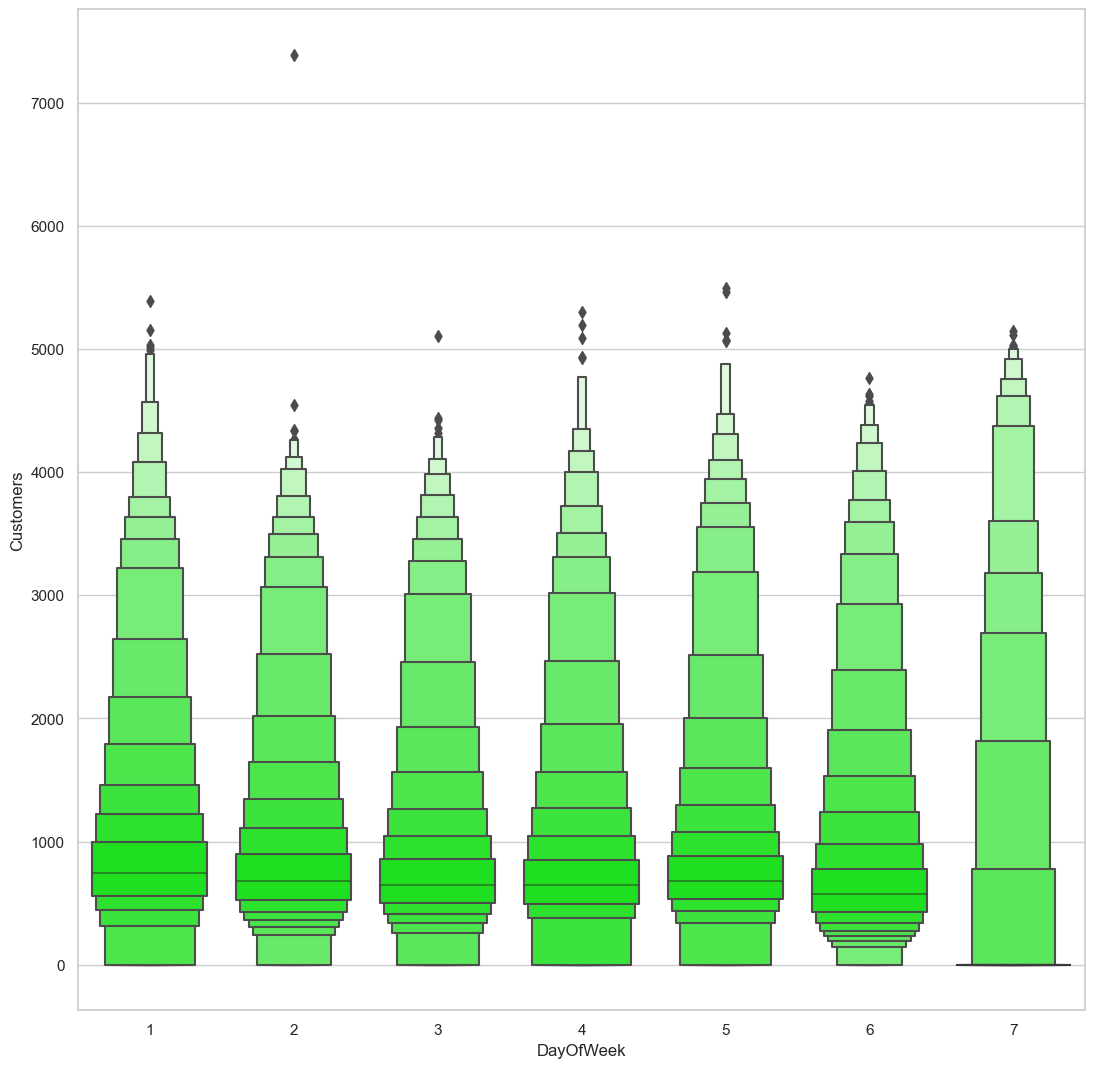

In [24]:
plt.figure(figsize=(13,13))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=train_data, scale="linear",color="lime")

In [25]:
train_store_cleaner = DataCleaner(train_store)

In [26]:
train_store_cleaner.replace_outlier_with_median(train_store, 'Customers')
train_store_cleaner.replace_outlier_with_median(train_store, 'Sales')

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,31,5263.0,555.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,2015,7,30,5020.0,546.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,2015,7,29,4782.0,523.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,1,2,2015-07-28,2015,7,28,5011.0,560.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,1,1,2015-07-27,2015,7,27,6102.0,612.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,2013,1,5,4771.0,339.0,1,0,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,2013,1,4,4540.0,326.0,1,0,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,2013,1,3,4297.0,300.0,1,0,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,2013,1,2,3697.0,305.0,1,0,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Feature Extraction

In [28]:
# WeekDays
manu = DataManipulator(train_store)

In [30]:
# weekdays
manu.add_week_day('DayOfWeek')

In [31]:
# number of days to holydays
manu.add_number_of_days_to_holiday('StateHoliday')

In [32]:
# number of days after holydays
manu.add_number_of_days_after_holiday('StateHoliday')

In [33]:
# Beginning of month, mid month and ending of month
manu.add_month_timing('Day')

### More Features